## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [ ]:
!pip install keras
!pip install tensorflow 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


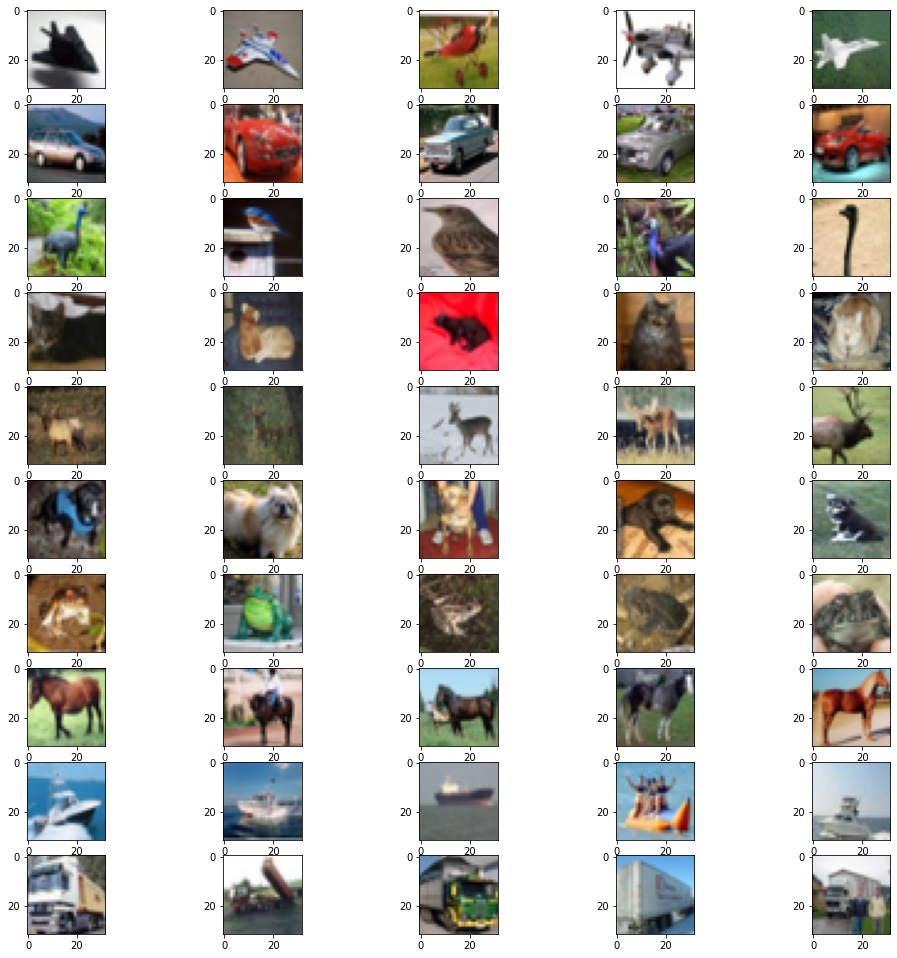

In [ ]:
def plot(x_train,y_train):
  fig, ax = plt.subplots(10,5, figsize=(17,17))
  for j in range(10):
    img = np.where(y_train==j)[0][:5]
    for i,n in enumerate(img):
      ax[j,i].imshow(x_train[n])
plot(x_train,y_train)

In [ ]:
#take a small sample
x_train=x_train[:10000,:]
y_train=y_train[:10000,:]
x_test=x_test[:3000,:]
y_test=y_test[:3000,:]

In [ ]:
x_train=x_train.reshape(10000,-1)/255
y_train=y_train.reshape(-1,)
x_test=x_test.reshape(3000,-1)/255
y_test=y_test.reshape(-1,)
labels=list(set(y_train))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(labels)

(10000, 3072)
(10000,)
(3000, 3072)
(3000,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#KNN-classifier

1- Distances to every point in the training dataset is calculated

2- The training dataset classes are sorted by distance to the data point

3- The first k classes are kept and stored in the neighbors list Now we simply map the list of nearest neighbors to our most_common function, returning a list of predictions for each point passed in X_test.

In [ ]:
def voting_method(votes):
    
    return max(set(votes), key=votes.count)

In [ ]:
#Step 1: Calculate Euclidean Distance.
from math import sqrt
def euclidean_distance(point, data):
    distance= np.sqrt(np.sum((point - data)**2, axis=1))
    return distance

In [ ]:
#Step 2: Get Nearest Neighbors.
class KNeighborsClassifier_self():
    def __init__(self, k=5, dist_metric=euclidean_distance):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(voting_method, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

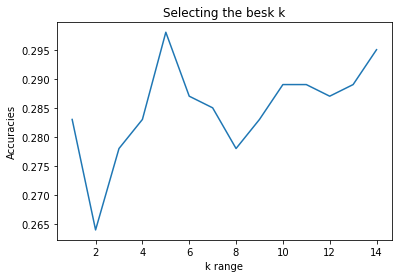

In [ ]:
#get the best number of k
accuracies = []
k_values = range(1, 15)
for k in k_values:
    knn = KNeighborsClassifier_self(k=k)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(k_values, accuracies)
ax.set(xlabel="k range",
       ylabel="Accuracies",
       title="Selecting the besk k")
plt.show()


# The reason of choosing value of K =5 

1- I fitted the model with different values of k (range values were from 1 to 15)

2- then draw the relations between values if k and the accuracies 

3- so, the highest accuracy was whene we fitted the k =5 

In [ ]:
#apply the knn_self to our data according to best number of k
knn_self=KNeighborsClassifier_self(k=5)
knn_self.fit(x_train,y_train)
self_pred=knn_self.predict(x_test)
accuracy_score(self_pred,y_test)

0.2843333333333333

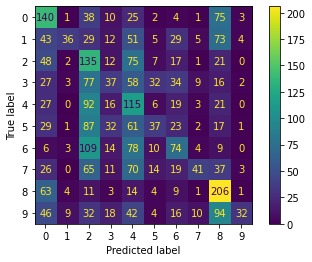

In [ ]:
#plot according to my self_knn
confusion= confusion_matrix(y_test, self_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

In [ ]:
#knn_sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
skleanr_pred=clf.predict(x_test)
accuracy_score(skleanr_pred,y_test)

0.2823333333333333

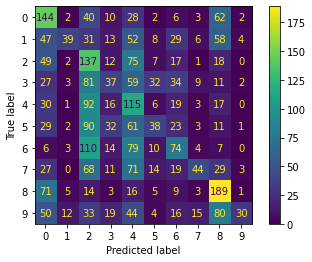

In [ ]:
#plot according to sklearn knn
confusion= confusion_matrix(y_test, skleanr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

#Discusion 

1- the best value of choosing k was 5

2- beacuse the Knn is taking time on calculating vectorization is  agood plan to decrease it .

#logistic_regression

In [ ]:
def logisticRegression_ovr(label,x_train,y_train):
  y_train=[1 if i==label else 0 for i in y_train]
  clf = LogisticRegression(random_state=0)
  clf.fit(x_train,y_train)
  return clf.predict_proba(x_test)[:,1]

In [ ]:
pred=[]
for i in labels:
 pred.append(logisticRegression_ovr(i,x_train,y_train))
clear_output()
predicted=np.argmax(np.array(pred),0)

In [ ]:
accuracy_score(predicted,y_test)

0.3443333333333333

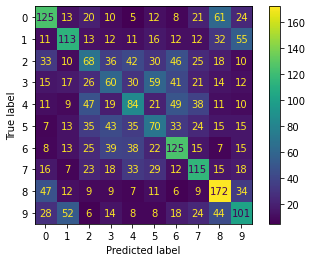

In [ ]:
confusion = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

#SVM

In [ ]:
#baseline of svm
from sklearn.svm import LinearSVC
clf= LinearSVC(random_state=0,multi_class='ovr', tol=1e-5)
clf.fit(x_train, y_train)
pred_svm=clf.predict(x_test)
accuracy_score(pred_svm,y_test)

C:\Users\Ali mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.252

In [ ]:
#tunning the values of c
c_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy=[]
for i in c_values:
  clf= LinearSVC(random_state=0,multi_class='ovr',C=i, tol=1e-5)
  clf.fit(x_train, y_train)
  pred_svm=clf.predict(x_test)
  accuracy.append(accuracy_score(pred_svm,y_test))
clear_output()

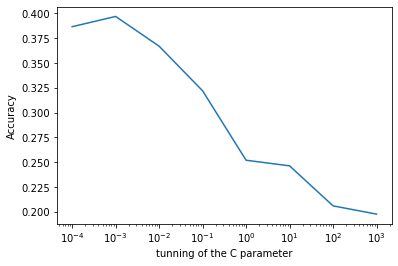

In [ ]:
plt.plot(c_values, accuracy)
plt.xlabel('tunning of the C parameter')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [ ]:
#add regularization term l1
c_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy=[]
for i in c_values:
  clf= LinearSVC(random_state=0,multi_class='ovr',C=i,penalty='l1', tol=1e-5,loss='squared_hinge',dual=False)
  clf.fit(x_train, y_train)
  pred_svm=clf.predict(x_test)
  accuracy.append(accuracy_score(pred_svm,y_test))
clear_output()
accuracy

[0.106,
 0.16733333333333333,
 0.348,
 0.38766666666666666,
 0.314,
 0.291,
 0.29233333333333333,
 0.2896666666666667]

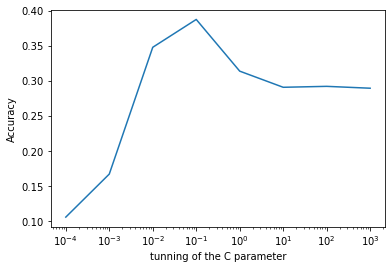

In [ ]:
plt.plot(c_values, accuracy)
plt.xlabel('tunning of the C parameter')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [ ]:
#final experiment 
from sklearn.svm import SVC
cost = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]
accuracy=[]
accuracy_for_cost=[]
pred_final=[]
for i in cost:
  accuracy=[]
  pred = []
  for j in gamma:
    clf= SVC(random_state=0,C=i,gamma=j,kernel='rbf')
    clf.fit(x_train, y_train)
    pred_svm=clf.predict(x_test)
    pred.append(pred_svm)
    accuracy.append(accuracy_score(pred_svm,y_test))  
  accuracy_for_cost.append(max(accuracy))
  pred_final.append(pred[np.argmax(accuracy)])
  
clear_output()


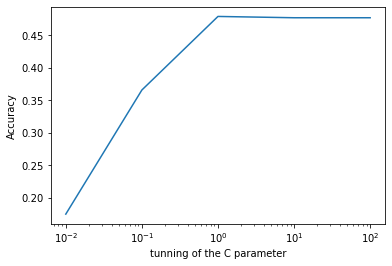

In [ ]:
plt.plot(cost, accuracy_for_cost)
plt.xlabel('tunning of the C parameter')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.show()

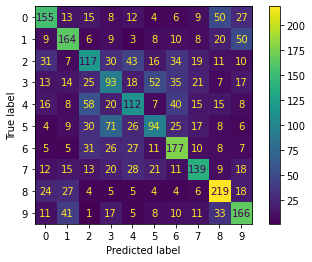

In [ ]:
confusion = confusion_matrix(y_test, pred_final[np.argmax(accuracy_for_cost)])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

#discussion 

1- in the parameter of tunning c, the highest accuracy was with the smallest value of c because the value of c is inversly proportion with the regularization (so when c is low, then low error and when c is high, then high error ) but the accuracy increased after adding the value of c comparing with the base model as the default value is c= 1 and this is large value with lead to high error.and the best value of c=.001

2- when adding the L1 term the accuracy was decreased to the 38.7% but still is higher than the base line .

3- when adding the gamma term to the model and replace the Linear svc with the svm , the accuracy reached to the 48%

##Part 4. Write a Conclusion (1 Mark)



#KNN-Model 

1-  As suggested of choosing the best value of k would be odd number but that not condition so i tried to choose based on the accuracy not the suggestion. the highest accuracy was 30% when using k value =10 and that appeared when after fitted the model and compare between the accuracies .

#logistic regression 

1- the accuracy of logistic regression transcends the accuracy of KNN and reache to 35% but after applied SVC , i found svc yield accuracy higher than logistic regression 

#SVM 

1- in the parameter of tunning c, the highest accuracy was with the smallest value of c because the value of c is inversly proportion with the regularization (so when c is low, then low error and when c is high, then high error ) but the accuracy increased after adding the value of c comparing with the base model as the default value is c= 1 and this is large value with lead to high error.and the best value of c=.001

2- when adding the L1 term the accuracy was decreased to the 38.7% but still is higher than the base line .

3- when adding the gamma term to the model and replace the Linear svc  with the svm , the accuracy reached to the 48%  

#AS an all 

1- all models yield very low accuracy, that because the quality of images is very bad and  choosing model is wrong beacuse we treat with very large images, the best choise is deep learning especially CNN .

2- the best model here was SVC withe hyperparameter Gamma and COST .